# Importing Required Libraries

In [30]:
import pandas as pd
import numpy as np 
import torch
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean
from sklearn.preprocessing import MinMaxScaler

from torch import Tensor
from sklearn.model_selection import train_test_split

In [2]:
 df= pd.read_csv('https://raw.githubusercontent.com/Brlsadiksha/project/main/hr_final.csv?token=GHSAT0AAAAAAB6JXRUEBDB5ITLBJ3ENWT5CY6456HQ')

In [3]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,...,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age_tier,distancehome_tier,JobRole_tier,MonthlyIncome_tier
0,0,51,0,2,2,6,2,1,0,1,...,0,3,3,3.0,4.0,2.0,3,3,4,5
1,1,31,1,1,1,10,1,1,0,1,...,4,2,4,3.0,2.0,4.0,1,3,1,3
2,2,32,0,1,1,17,4,4,1,4,...,3,3,3,2.0,2.0,1.0,1,2,1,5
3,3,38,0,0,1,2,5,1,1,3,...,5,2,3,4.0,4.0,3.0,1,4,4,4
4,4,32,0,2,1,10,1,3,1,1,...,4,3,3,4.0,1.0,3.0,1,3,1,1


# Feature selection

In [4]:
data = df[['TotalWorkingYears','MonthlyIncome','JobSatisfaction','WorkLifeBalance', 'Attrition']]
data

,TotalWorkingYears,MonthlyIncome,JobSatisfaction,WorkLifeBalance,Attrition
0,1.0,131160,4.0,2.0,0
1,6.0,41890,2.0,4.0,1
2,5.0,193280,2.0,1.0,0
3,13.0,83210,4.0,3.0,0
4,9.0,23420,1.0,3.0,0
...,...,...,...,...,...
4377,6.0,35390,4.0,3.0,0
4378,10.0,60290,1.0,3.0,0
4379,10.0,26790,4.0,3.0,0
4380,5.0,37020,3.0,3.0,0


# Standard ML preprocessing 

In [5]:
scaler =  MinMaxScaler()
data_scaled = scaler.fit_transform(data[['TotalWorkingYears','MonthlyIncome', 'JobSatisfaction','WorkLifeBalance']])
data_s = pd.DataFrame(data_scaled, columns=['TotalWorkingYears','MonthlyIncome','JobSatisfaction','WorkLifeBalance'])


In [6]:
data_s

,TotalWorkingYears,MonthlyIncome,JobSatisfaction,WorkLifeBalance
0,0.025,0.637546,1.000000,0.333333
1,0.150,0.167457,0.333333,1.000000
2,0.125,0.964666,0.333333,0.000000
3,0.325,0.385045,1.000000,0.666667
4,0.225,0.070195,0.000000,0.666667
...,...,...,...,...
4377,0.150,0.133228,1.000000,0.666667
4378,0.250,0.264350,0.000000,0.666667
4379,0.250,0.087941,1.000000,0.666667
4380,0.125,0.141811,0.666667,0.666667


In [7]:
data_all = pd.concat([data[['Attrition']], data_s], axis=1)
data_all

,Attrition,TotalWorkingYears,MonthlyIncome,JobSatisfaction,WorkLifeBalance
0,0,0.025,0.637546,1.000000,0.333333
1,1,0.150,0.167457,0.333333,1.000000
2,0,0.125,0.964666,0.333333,0.000000
3,0,0.325,0.385045,1.000000,0.666667
4,0,0.225,0.070195,0.000000,0.666667
...,...,...,...,...,...
4377,0,0.150,0.133228,1.000000,0.666667
4378,0,0.250,0.264350,0.000000,0.666667
4379,0,0.250,0.087941,1.000000,0.666667
4380,0,0.125,0.141811,0.666667,0.666667


In [8]:
# Train-test 
data_x = torch.tensor(data_all[['TotalWorkingYears','MonthlyIncome', 'JobSatisfaction','WorkLifeBalance']].values.astype(np.float32))
data_y = torch.tensor(data_all[['Attrition']].values.astype(np.float32))

In [9]:
print(data_x.size())
print(data_y.size())

torch.Size([4382, 4])
torch.Size([4382, 1])


# Train test split

In [10]:
X_train , X_test , y_train ,y_test = train_test_split(data_x , data_y, test_size=0.2 , random_state= 52)
print(X_train.shape)
print(y_train.shape)

torch.Size([3505, 4])
torch.Size([3505, 1])


# Training a simple model.






In [11]:

# Initializing Hyperparameters
epochs = 1000
learning_rate = 0.1
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net1 = torch.nn.Linear(4,1)
model_net1_actfun = torch.nn.Sigmoid()
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net1.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm(range(epochs), total=epochs, unit="epoch"):
      output = model_net1_actfun.forward(model_net1.forward(X_train))
      # 2. FeedForward Evaluation
      loss = loss_mse(output, y_train)
      optimizer.zero_grad();

      # 3. Backward / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      loss_set[i] = loss.item()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
        print (f"Loss{i}: {loss.item()}")
      # 4. Back Propagation
      optimizer.step()


<ipython-input-11-fe2a0439aea1>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/1000 [00:00<?, ?epoch/s]

Loss0: 0.279727041721344
Loss10: 0.13058485090732574
Loss20: 0.12955242395401
Loss30: 0.12884417176246643
Loss40: 0.1283358931541443
Loss50: 0.12794888019561768
Loss60: 0.12763968110084534
Loss70: 0.1273849457502365
Loss80: 0.1271713376045227
Loss90: 0.12699046730995178
Loss100: 0.12683644890785217
Loss110: 0.12670490145683289
Loss120: 0.12659232318401337
Loss130: 0.12649595737457275
Loss140: 0.12641341984272003
Loss150: 0.1263428032398224
Loss160: 0.12628237903118134
Loss170: 0.12623080611228943
Loss180: 0.12618686258792877
Loss190: 0.12614946067333221
Loss200: 0.12611772119998932
Loss210: 0.1260908842086792
Loss220: 0.12606826424598694
Loss230: 0.12604928016662598
Loss240: 0.12603342533111572
Loss250: 0.12602020800113678
Loss260: 0.12600933015346527
Loss270: 0.12600038945674896
Loss280: 0.12599307298660278
Loss290: 0.1259871870279312
Loss300: 0.12598246335983276
Loss310: 0.12597869336605072
Loss320: 0.12597574293613434
Loss330: 0.1259734332561493
Loss340: 0.12597167491912842
Loss350:

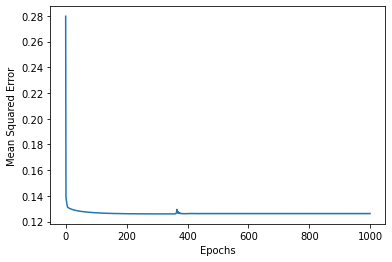

In [12]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

## Training attrition through HR attrition dataset with four inputs and one hidden layer

In [27]:
# Initializing Hyperparameters
# epochs = 100, as lost was not decreasing after 50
#learning_rate = 0.01, minimum loss 0.126, 
#learning rate =  0.1, minimum loss = 0.137
#learning rate = 0.005, minimum loss = 0.127 

epochs = 50
learning_rate = 0.01
loss_set = {}

# 1. Creating a Neural Network
model_net2 = torch.nn.Sequential(torch.nn.Linear(4,3),
                                 torch.nn.ReLU(),
                                 torch.nn.Linear(3,1),
                                 torch.nn.Sigmoid()
                                 );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net2.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_train, y_train):
          output = model_net2.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-27-67598857a54d>:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/50 [00:00<?, ?epoch/s]

Loss: 0.13097208738327026
Loss: 0.12731775641441345
Loss: 0.12728053331375122
Loss: 0.12729382514953613
Loss: 0.12731704115867615


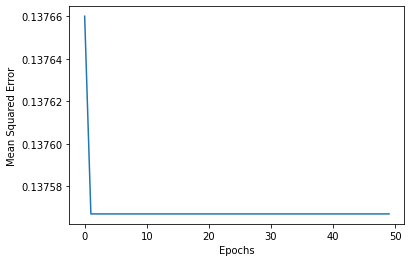

In [21]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [28]:
# Now lets save our trained model
# save the trained model
torch.save(model_net2, 'model_net4.pkl')

# Evaluate the final model on the test data.

In [29]:
#   Lets load the model for inference

model = torch.load('model_net4.pkl')
model.eval()

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=1, bias=True)
  (3): Sigmoid()
)

In [38]:
total_loss = 0
with torch.no_grad():
  for x, y_t in zip(X_test, y_test):
      output = model.forward(x.float())
      loss = loss_mse(output, y_t.float())
      total_loss += loss.item()
print(f'test loss: {total_loss/len(y_test)}')

test loss: 0.12886359330557237
